## SDE schemes - Euler and Milstein


### In any of packages are missing, use syntax below
#### E.g. to install scipy
!pip install scipy

In [1]:
# not all packages are used in this example. They are imported here for convinience to be used in future examples
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as ppx
import scipy as scp
from scipy.stats import norm
from TutorialBlackScholes import * 
import warnings
import sys

warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [2]:

print("seaborn",sns.__version__)
print("pandas",pd.__version__)
print("matplotlib",mplt.__version__)
print("seaborn",sns.__version__)
print("matplotlib",mplt.__version__)
print("plotly",ppx.__version__)
print("numpy",np.__version__)
print("scipy",scp.__version__)

print("\n")
print("python",sys.version)
print("\n")

seaborn 0.13.2
pandas 2.2.2
matplotlib 3.9.1.post1
seaborn 0.13.2
matplotlib 3.9.1.post1
plotly 5.23.0
numpy 2.0.1
scipy 1.14.0


python 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:27:10) [MSC v.1938 64 bit (AMD64)]




### initalise values

In [8]:
#Initial Values
T = 1
R = 0.1
sigma = 0.2
N = 100
M =  100
S = 100
K = 100
Barrier = 90
    

In [9]:
#Example of BlackScholes called from TutorialBlackScholes.py

BSE_Price = BS_Call_E(S,K,T,R, sigma)
print("\nBlack Scholes Price without Barrier - ", round(BS_Call_E(S,K,T,R, sigma),6))
print('\n')
print("Barrier BS - ", round(BS_Barrier_CDO(S,K,Barrier,T,R,sigma),6))
print('\n')


Black Scholes Price without Barrier -  13.269677


Barrier BS -  11.233188




In [10]:
# Vomma 
#%%time

#Example pf Vega call from  TutorialBlackScholes.py
print("Vega", BS_Vega(S, K, T, R, sigma))


#Example of Implied Vol

print('Implied Vol from Price', BS_Implied_Vol(BSE_Price, S, K, T, R))

#Example of Vomma Vol of  Vol
print("Vomma", BS_Vomma(S, K, T, R, sigma))
print('\n\n')



Vega 33.322460289179965
Implied Vol from Price 0.20000000007377983
Vomma 39.98695234701595





Option Price -  12.494907  with Barrier -  90
Probability of hitting barrier -  43.43 %
Barrier BS -  11.233188195745008


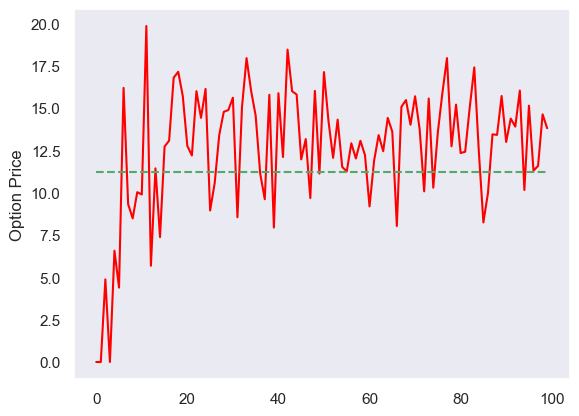

In [14]:
# Milstein Scheme


def Milstein(S, K, T, R, sigma, M, N):
    
    # grid points
    T_INIT = 0
    T_END = T

    DT = float(T_END - T_INIT) / M
    TS = np.arange(T_INIT, T_END + DT, DT)
   
    Y_INIT = 1

    # Vectors to fill
    ys = np.zeros(M + 1)
    V  = np.zeros(N)
    ys[0] = S
    mu = 0
    
    for j in range(N):
        for i in range(1, TS.size):
                t = (i - 1) * DT
                y = ys[i - 1]
                dw =  np.random.normal(loc=0.0, scale=np.sqrt(DT)) 
        
                # Sum up terms as in the Milstein method 
                ys[i] = y + R * y * DT + sigma * y * dw + (sigma**2 / 2) * y * (dw**2 - DT) 

        if np.min(ys) <= Barrier :
            a = 0
        else:
            a = 1 
        mu = mu + a    

        
        V[j] =  np.maximum(ys[TS.size-1] - K,0) * a
    
    return  V, mu


#def plot_simulations(num_sims: int):
  
VV = np.zeros(N)
for i in range(1,N):
    price, mu = Milstein(S, K, T, R, sigma, M, N)
    VV[i] =  np.sum(price[0:i])  /  i


OptionPrice = np.exp(-R*T) * VV[N-1]

mu = np.exp(-R*T) * (1- mu / N    )

print("Option Price - ",round(OptionPrice,6)," with Barrier - ", Barrier)
print("Probability of hitting barrier - ",round(mu*100,2),"%")
BSE_CDO_Price = BS_Barrier_CDO(S,K,Barrier,T,R, sigma)
print("Barrier BS - ", BSE_CDO_Price)

plt.plot(VV, color = 'red')

plt.plot(range(N), [BSE_CDO_Price for i in range(N)] ,linestyle='--', color='g')  # color='green' , marker='o'

#plt.xlabel("time (s)")
plt.ylabel("Option Price")
plt.grid()
plt.show()



In [25]:
#Re-Initial Values for Euler
T = 0.25
R = 0.1
sigma = 0.2
N = 100
M =  100
S = 100
K = 100
Barrier = 80

In [26]:
#Euler Scheme

Asset_At_Exp = np.zeros(N)
mu = 0

# grid points
T_INIT = 0
T_END = T

DT = float(T_END - T_INIT) / M

for i in range(N):
    
        Asset = np.zeros(M+1)
        Asset[0] = S

        xi = np.random.normal(0, 1, M)
        for k in range(M):
            Asset[k+1] = Asset[k] + Asset[k] * R * DT + Asset[k] * sigma * np.sqrt(DT) * xi[k]

        if np.min(Asset) <= Barrier:
            a = 0
        else:
            a = 1
            
        mu = mu + a    

        Asset[k+1] =  np.maximum(Asset[k+1]-K,0)*a
        
        Asset_At_Exp[i] = Asset[k+1]


OptionPrice = np.exp(-R*T) * np.sum(Asset_At_Exp) / N 

mu = np.exp(-R*T) * (1- mu / N    )
print("Option Price - ",round(OptionPrice,6)," with Barrier - ", Barrier)
print("Probability of hitting barrier - ",round(mu*100,2),"%")
print("Barrier BS - ", BS_Barrier_CDO(S,K,Barrier,T,R,sigma))


Option Price -  5.27793  with Barrier -  80
Probability of hitting barrier -  1.95 %
Barrier BS -  5.2953597885886365


Barrier BS -  5.2953597885886365


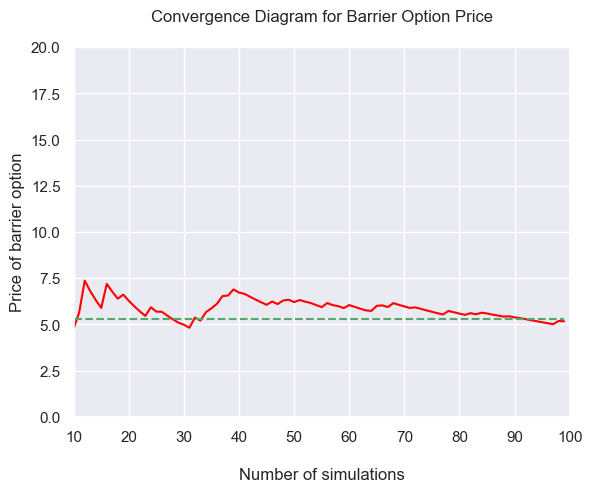

In [27]:
U = []
U = [0 for i in range(N)]


for i in range(1,N):
    U[i] =  np.exp(-R*T) * np.sum(Asset_At_Exp[0:i])/i   

BSE_CDO_Price = BS_Barrier_CDO(S,K,Barrier,T,R, sigma)
print("Barrier BS - ", BSE_CDO_Price)


plt.plot(range(N), U, color='red')
plt.plot(range(N), [BSE_CDO_Price for i in range(N)] ,linestyle='--', color='g')  # color='green' , marker='o'

plt.xlabel('\nNumber of simulations')
plt.ylabel('Price of barrier option')
plt.title('Convergence Diagram for Barrier Option Price\n')
plt.xlim((10,N))
#you need to change y-axis limit depending on your result
plt.ylim((0,20))

plt.show()